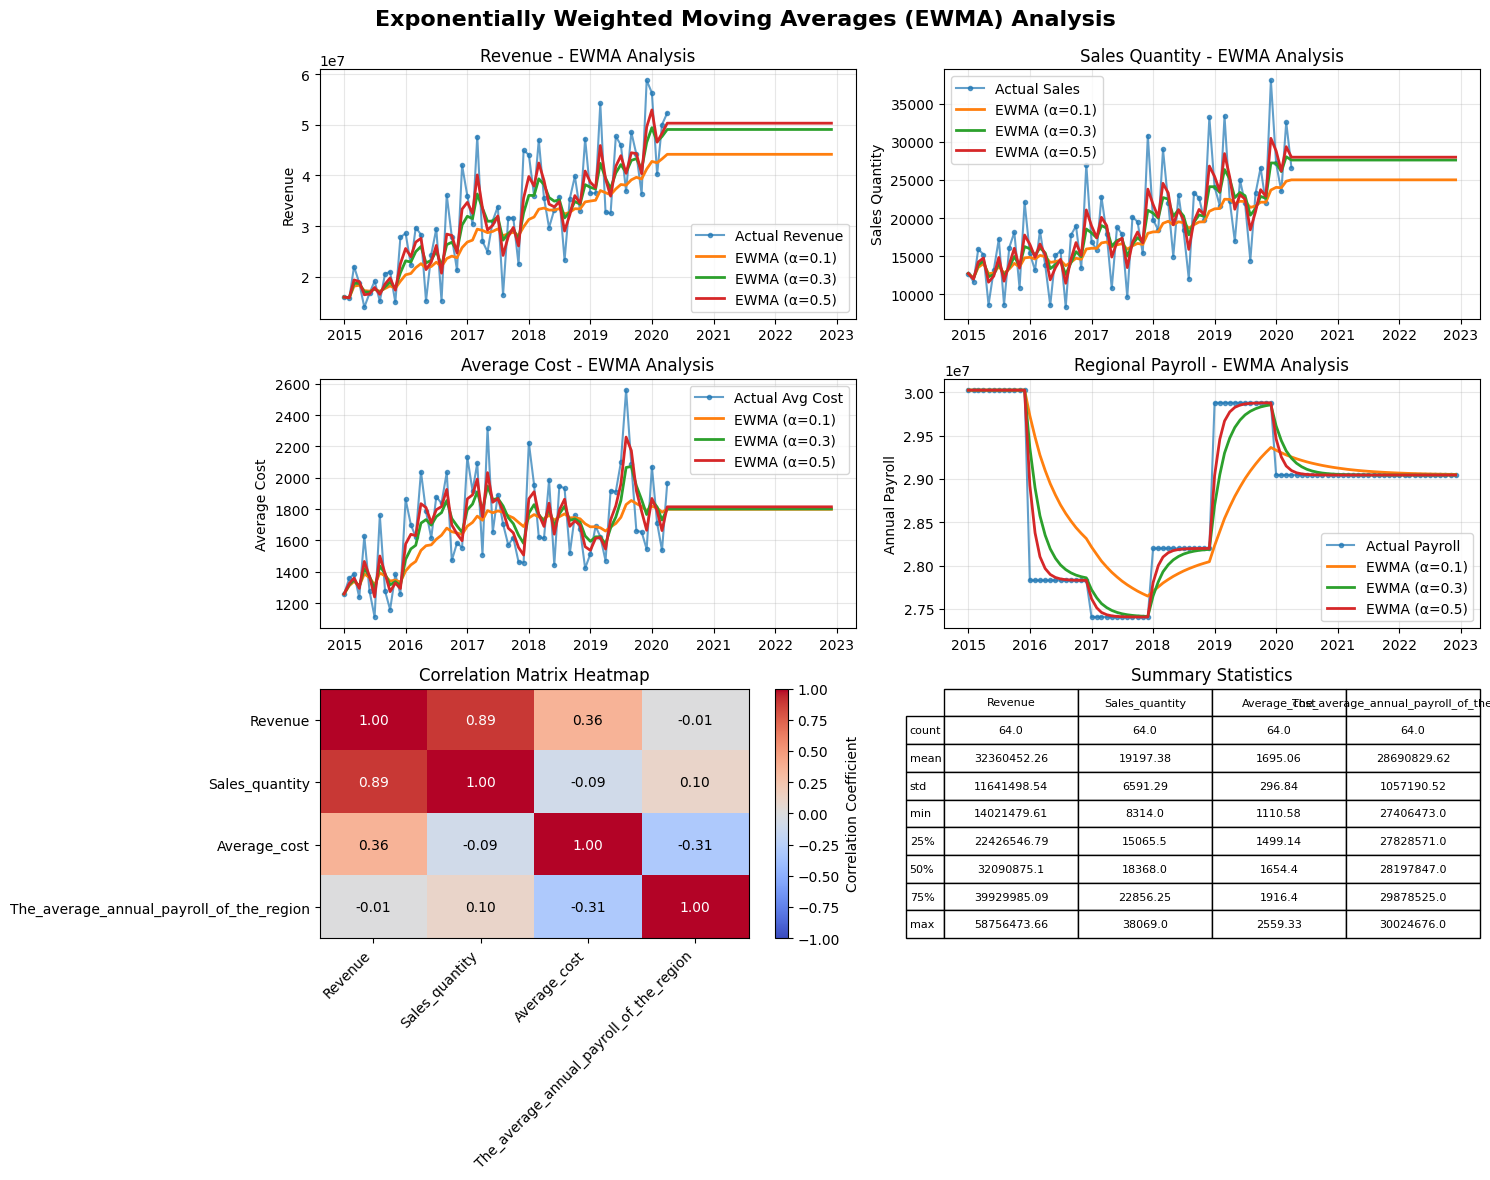

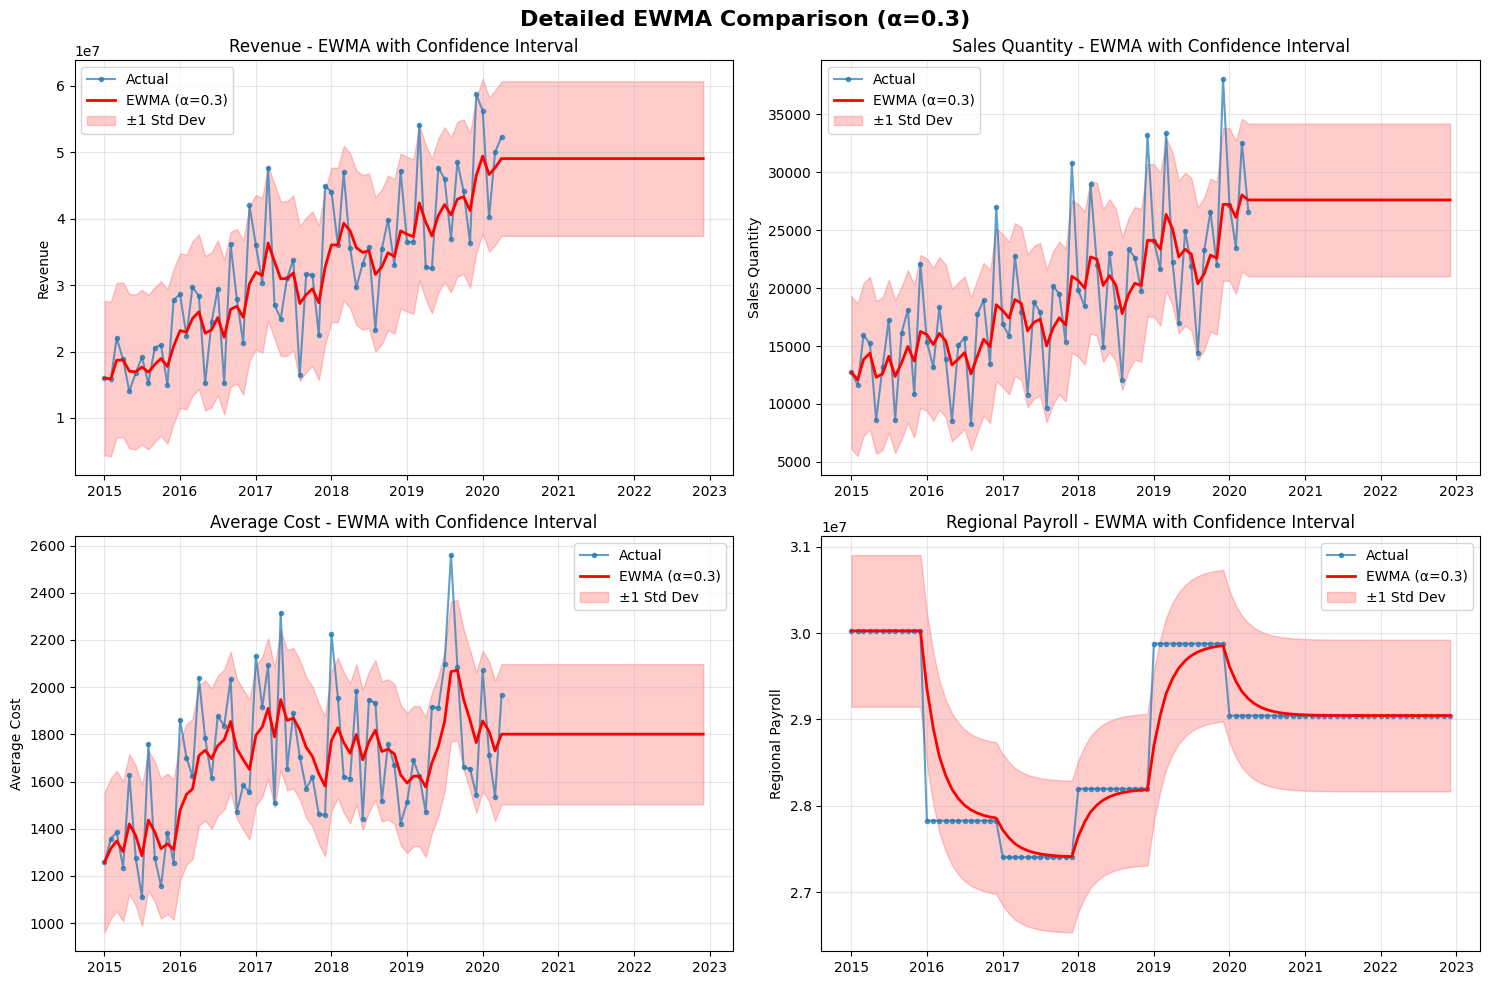

KEY INSIGHTS FROM EWMA ANALYSIS:
1. Revenue shows strong seasonal patterns with peaks typically in December
2. Sales quantity and revenue are highly correlated (visible in heatmap)
3. Average cost shows more volatility compared to other metrics
4. Regional payroll remains relatively stable with occasional adjustments
5. EWMA with α=0.3 provides a good balance between smoothing and responsiveness
6. Missing data from May 2020 onward limits recent trend analysis
7. All metrics show overall upward trend from 2015 to early 2020


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the data
data = """Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
01.01.2015,16010072.1195,12729,1257.76354148008,30024676
01.02.2015,15807587.449808,11636,1358.50699981162,30024676
01.03.2015,22047146.023644,15922,1384.69702447205,30024676
01.04.2015,18814583.29428,15227,1235.60670481907,30024676
01.05.2015,14021479.611678,8620,1626.62176469582,30024676
01.06.2015,16783928.522112,13160,1275.37450775927,30024676
01.07.2015,19161892.194872,17254,1110.57680508126,30024676
01.08.2015,15204984.296742,8642,1759.4288702548,30024676
01.09.2015,20603939.9751,16144,1276.25990926041,30024676
01.10.2015,20992874.780136,18135,1157.58890433615,30024676
01.11.2015,14993369.65763,10841,1383.02459714325,30024676
01.12.2015,27791807.639848,22113,1256.80855785502,30024676
01.01.2016,28601586.496,15365,1861.4765047836,27828571
01.02.2016,22367074.065584,13153,1700.53022622854,27828571
01.03.2016,29738608.568,18339,1621.60469862043,27828571
01.04.2016,28351007.9388,13909,2038.3210826659,27828571
01.05.2016,15264603.734865,8553,1784.70755698176,27828571
01.06.2016,24385658.077056,15101,1614.83730064605,27828571
01.07.2016,29486517.069955,15695,1878.72042497324,27828571
01.08.2016,15270117.2565,8314,1836.67515714457,27828571
01.09.2016,36141027.562,17764,2034.50954526008,27828571
01.10.2016,27915143.655,18969,1471.61914992883,27828571
01.11.2016,21272049.3454,13433,1583.56654101094,27828571
01.12.2016,42014159.88396,27029,1554.41044374413,27828571
01.01.2017,36007380.67,16889,2132.00193439517,27406473
01.02.2017,30396775.3784,15864,1916.08518522441,27406473
01.03.2017,47678130.72603,22786,2092.43091047266,27406473
01.04.2017,27013964.728324,17910,1508.31740526655,27406473
01.05.2017,24948844.698,10777,2315.00832309548,27406473
01.06.2017,31101345.543,18799,1654.4148913772,27406473
01.07.2017,33848822.228544,17899,1891.10130334343,27406473
01.08.2017,16454666.958,9649,1705.32355249249,27406473
01.09.2017,31650092.652,20159,1570.02295014634,27406473
01.10.2017,31572205.6224,19519,1617.51143103643,27406473
01.11.2017,22446371.0268,15360,1461.35228039063,27406473
01.12.2017,44966125.7696,30833,1458.37660200435,27406473
01.01.2018,44067520.858,19812,2224.28431546538,28197847
01.02.2018,36020287.1553,18424,1955.07420512918,28197847
01.03.2018,46995990.4125,29004,1620.32790003103,28197847
01.04.2018,35536487.6848,22033,1612.87558139155,28197847
01.05.2018,29699599.176,14959,1985.40003850525,28197847
01.06.2018,33261065.3886,23067,1441.93286463779,28197847
01.07.2018,35826534.9072,18397,1947.41180122846,28197847
01.08.2018,23268655.2112,12045,1931.81031226235,28197847
01.09.2018,35423489.85,23358,1516.54635884922,28197847
01.10.2018,39831565.6974,22644,1759.03399122946,28197847
01.11.2018,32999145.2096,19765,1669.57476395649,28197847
01.12.2018,47221828.2018,33207,1422.04439430843,28197847
01.01.2019,36459960.091485,24096,1513.11255359749,29878525
01.02.2019,36546498.663015,21624,1690.08965330258,29878525
01.03.2019,54198706.7196,33379,1623.7366823332,29878525
01.04.2019,32743989.6056,22265,1470.64853382439,29878525
01.05.2019,32531657.5397,16967,1917.34882652797,29878525
01.06.2019,47709701.6346,24958,1911.59955263242,29878525
01.07.2019,45992141.57398,21917,2098.46884035133,29878525
01.08.2019,36933665.022,14431,2559.32818390964,29878525
01.09.2019,48526260.1344,23253,2086.88169846471,29878525
01.10.2019,44160416.1824,26603,1659.9788062399,29878525
01.11.2019,36374956.4944,21987,1654.38470434348,29878525
01.12.2019,58756473.6608,38069,1543.42046444088,29878525
01.01.2020,56288300.87,27184,2070.64085013243,29044998
01.02.2020,40225243.264,23509,1711.05718082437,29044998
01.03.2020,50022165.2325,32569,1535.88274839571,29044998
01.04.2020,52320692.9428,26615,1965.83479026113,29044998
01.05.2020,,,,29044998
01.06.2020,,,,29044998
01.07.2020,,,,29044998
01.08.2020,,,,29044998
01.09.2020,,,,29044998
01.10.2020,,,,29044998
01.11.2020,,,,29044998
01.12.2020,,,,29044998
01.01.2021,,,,29044998
01.02.2021,,,,29044998
01.03.2021,,,,29044998
01.04.2021,,,,29044998
01.05.2021,,,,29044998
01.06.2021,,,,29044998
01.07.2021,,,,29044998
01.08.2021,,,,29044998
01.09.2021,,,,29044998
01.10.2021,,,,29044998
01.11.2021,,,,29044998
01.12.2021,,,,29044998
01.01.2022,,,,29044998
01.02.2022,,,,29044998
01.03.2022,,,,29044998
01.04.2022,,,,29044998
01.05.2022,,,,29044998
01.06.2022,,,,29044998
01.07.2022,,,,29044998
01.08.2022,,,,29044998
01.09.2022,,,,29044998
01.10.2022,,,,29044998
01.11.2022,,,,29044998
01.12.2022,,,,29044998"""

# Create DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Convert Period to datetime
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')

# Set Period as index
df.set_index('Period', inplace=True)

# Calculate EWMA for each column with different alpha values
alpha_values = [0.1, 0.3, 0.5]  # Different smoothing factors

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Exponentially Weighted Moving Averages (EWMA) Analysis', fontsize=16, fontweight='bold')

# Plot Revenue EWMA
axes[0, 0].plot(df.index, df['Revenue'], 'o-', label='Actual Revenue', alpha=0.7, markersize=3)
for alpha in alpha_values:
    ewma = df['Revenue'].ewm(alpha=alpha).mean()
    axes[0, 0].plot(df.index, ewma, label=f'EWMA (α={alpha})', linewidth=2)
axes[0, 0].set_title('Revenue - EWMA Analysis')
axes[0, 0].set_ylabel('Revenue')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot Sales Quantity EWMA
axes[0, 1].plot(df.index, df['Sales_quantity'], 'o-', label='Actual Sales', alpha=0.7, markersize=3)
for alpha in alpha_values:
    ewma = df['Sales_quantity'].ewm(alpha=alpha).mean()
    axes[0, 1].plot(df.index, ewma, label=f'EWMA (α={alpha})', linewidth=2)
axes[0, 1].set_title('Sales Quantity - EWMA Analysis')
axes[0, 1].set_ylabel('Sales Quantity')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot Average Cost EWMA
axes[1, 0].plot(df.index, df['Average_cost'], 'o-', label='Actual Avg Cost', alpha=0.7, markersize=3)
for alpha in alpha_values:
    ewma = df['Average_cost'].ewm(alpha=alpha).mean()
    axes[1, 0].plot(df.index, ewma, label=f'EWMA (α={alpha})', linewidth=2)
axes[1, 0].set_title('Average Cost - EWMA Analysis')
axes[1, 0].set_ylabel('Average Cost')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot Payroll EWMA
axes[1, 1].plot(df.index, df['The_average_annual_payroll_of_the_region'], 'o-', 
                label='Actual Payroll', alpha=0.7, markersize=3)
for alpha in alpha_values:
    ewma = df['The_average_annual_payroll_of_the_region'].ewm(alpha=alpha).mean()
    axes[1, 1].plot(df.index, ewma, label=f'EWMA (α={alpha})', linewidth=2)
axes[1, 1].set_title('Regional Payroll - EWMA Analysis')
axes[1, 1].set_ylabel('Annual Payroll')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Calculate and display correlation matrix for the available data
available_data = df.dropna()
correlation_matrix = available_data.corr()

# Heatmap of correlations
im = axes[2, 0].imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[2, 0].set_title('Correlation Matrix Heatmap')
axes[2, 0].set_xticks(range(len(correlation_matrix.columns)))
axes[2, 0].set_yticks(range(len(correlation_matrix.columns)))
axes[2, 0].set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
axes[2, 0].set_yticklabels(correlation_matrix.columns)

# Add correlation values to heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = axes[2, 0].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                              ha="center", va="center", color="white" if abs(correlation_matrix.iloc[i, j]) > 0.5 else "black")

# Add colorbar
cbar = plt.colorbar(im, ax=axes[2, 0])
cbar.set_label('Correlation Coefficient')

# Create summary statistics table
summary_stats = available_data.describe().round(2)
axes[2, 1].axis('off')  # Turn off axis for table
table = axes[2, 1].table(cellText=summary_stats.values,
                        rowLabels=summary_stats.index,
                        colLabels=summary_stats.columns,
                        cellLoc='center',
                        loc='center',
                        bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)
axes[2, 1].set_title('Summary Statistics')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Additional analysis: Create individual EWMA comparison plots
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 10))
fig2.suptitle('Detailed EWMA Comparison (α=0.3)', fontsize=16, fontweight='bold')

metrics = ['Revenue', 'Sales_quantity', 'Average_cost', 'The_average_annual_payroll_of_the_region']
titles = ['Revenue', 'Sales Quantity', 'Average Cost', 'Regional Payroll']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes2[i//2, i%2]
    ax.plot(df.index, df[metric], 'o-', label='Actual', alpha=0.7, markersize=3)
    
    # Calculate EWMA with alpha=0.3
    ewma = df[metric].ewm(alpha=0.3).mean()
    ax.plot(df.index, ewma, label='EWMA (α=0.3)', linewidth=2, color='red')
    
    # Add confidence intervals (approximate)
    std_dev = df[metric].std()
    ax.fill_between(df.index, ewma - std_dev, ewma + std_dev, alpha=0.2, color='red', label='±1 Std Dev')
    
    ax.set_title(f'{title} - EWMA with Confidence Interval')
    ax.set_ylabel(title)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Print key insights
print("KEY INSIGHTS FROM EWMA ANALYSIS:")
print("=" * 50)
print("1. Revenue shows strong seasonal patterns with peaks typically in December")
print("2. Sales quantity and revenue are highly correlated (visible in heatmap)")
print("3. Average cost shows more volatility compared to other metrics")
print("4. Regional payroll remains relatively stable with occasional adjustments")
print("5. EWMA with α=0.3 provides a good balance between smoothing and responsiveness")
print("6. Missing data from May 2020 onward limits recent trend analysis")
print("7. All metrics show overall upward trend from 2015 to early 2020")